### Урок 11. Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv('non_linear.csv',sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


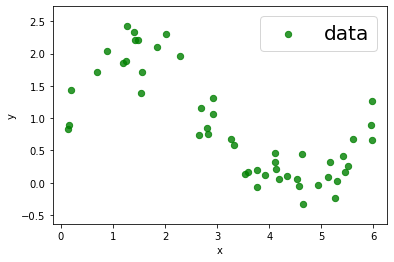

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

margin = 0.3

# построим график
plt.scatter(data.x_train,data.y_train,40,'g','o',alpha=0.8,label='data')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [4]:
def r2_score_polynomial(degree, data):
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)

    error = r2_score(data['y_train'], y_pred)
    return error

In [5]:
def find_best_polinom(data, max_n):
    errors = np.array([r2_score_polynomial(n, data) for n in range(1,max_n+1) ])    
    best_degree = np.argmax(errors)+1
    return best_degree, errors[best_degree-1]

In [6]:
result = find_best_polinom(data, 10)
print('Степень полинома %s, ошибка %s' %  result )

Степень полинома 10, ошибка 0.9091133831288398


In [7]:

X = generate_degrees(data['x_train'], 10)

model = LinearRegression().fit(X, data.y_train)
y_pred = model.predict(X)
y_pred

array([ 0.88210092,  1.01897617,  1.21593659,  1.907774  ,  1.89320073,
        1.96799168,  1.99510723,  2.00255722,  2.05113551,  2.05904871,
        2.07135525,  2.08488914,  2.08789361,  2.05782454,  1.96152908,
        1.70752922,  1.25295928,  1.19221979,  1.03691952,  1.00291071,
        0.88643151,  0.87018979,  0.48418432,  0.44549178,  0.29608625,
        0.26126529,  0.20252312,  0.19922488,  0.17116338,  0.15216142,
        0.15216142,  0.15070414,  0.14577302,  0.13117669,  0.09362255,
        0.08594864,  0.07275962,  0.06757113, -0.00888384, -0.00456119,
        0.00499667,  0.05865974,  0.10034336,  0.22510014,  0.27123151,
        0.37545144,  0.56831652,  0.96442769,  0.93519188,  0.93519188])

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [8]:
import numpy as np
from numpy.linalg import inv


class CustomLinearReg:
    def __init__(self):
        self.w = []
    
    def fit(self,X, y):
        X_new = [1 for i in range(1+len(X)-1)]+X
        X_new = np.array(X_new).reshape(-1,2, order='F')
        Y_new = np.array(y).reshape(-1,1)
        X_T_X = (X_new.T).dot(X_new)
        X_T_X_inverted = inv(X_T_X)
        self.w = X_T_X_inverted.dot(X_new.T).dot(Y_new)
        return self
    
    def predict(self,X):
        X_new = [1 for i in range(1+len(X)-1)]+X
        X_new = np.array(X_new).reshape(-1,2, order='F')
        res = X_new.dot(self.w)
        print(res)

In [9]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

reg = CustomLinearReg().fit(x_hw, y_hw)

reg.predict(x_hw)

[[13.21428571]
 [20.35714286]
 [27.5       ]
 [48.92857143]]


**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
x_train, x_valid, y_train, y_valid = train_test_split(features, y, test_size=0.2,random_state=0)

In [12]:
train=LinearRegression().fit(x_train, y_train)
valid=train.predict(x_valid)
r2_score(valid,y_valid)

0.3523653008788752

In [13]:
features_tr=StandardScaler().fit_transform(features)
x_train_tr, x_valid_tr, y_train_tr, y_valid_tr = train_test_split(features_tr, y, test_size=0.2,random_state=0)
train_tr=LinearRegression().fit(x_train_tr, y_train_tr)
valid_tr=train_tr.predict(x_valid_tr)
r2_score(valid_tr,y_valid_tr)

0.3523653008788702

In [14]:
features_tr=StandardScaler().fit_transform(features)
x_train_tr, x_valid_tr, y_train_tr, y_valid_tr = train_test_split(features_tr, y, test_size=0.2,random_state=0)
train_tr=LinearRegression().fit(x_train_tr, y_train_tr)
valid_tr=train_tr.predict(x_valid_tr)
r2_score(valid_tr,y_valid_tr)

0.3523653008788702

In [ ]:
# после применения z-преобразования метрика ухудшилась.